In [1]:
import pandas as pd

In [2]:
import io
df2 = pd.read_csv(r'C:\Users\pedro\Desktop\Data Science\python_intro\Base_de_Datos_Proyecto1\sales_predictions.csv')

In [3]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

In [4]:
df2.shape

(8523, 12)

Filas, Colummnas\
8523, 12

2) ¿Cuáles son los tipos de datos en cada variable?

In [5]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) ¿Hay duplicados? Si es el caso, eliminar algunos duplicados.

In [6]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [7]:
df2.duplicated().sum()

0

No hay duplicados.

4) Identificar los valores faltantes.

In [8]:
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5)Decidir cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [9]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Outlet_Size**

In [10]:
df2.groupby('Outlet_Identifier')['Outlet_Size'].count()

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

Los Outlet: OUT010,OUT017,OUT045. Carecen de tamano

In [11]:
df2.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].max()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store           NaN
OUT013             Supermarket Type1      High
OUT017             Supermarket Type1       NaN
OUT018             Supermarket Type2    Medium
OUT019             Grocery Store         Small
OUT027             Supermarket Type3    Medium
OUT035             Supermarket Type1     Small
OUT045             Supermarket Type1       NaN
OUT046             Supermarket Type1     Small
OUT049             Supermarket Type1    Medium
Name: Outlet_Size, dtype: object

In [12]:
Frequency_Size= df2.groupby('Outlet_Type')['Outlet_Size'].value_counts()
Frequency_Size

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

El unico valor que  se repite en la categoria Grocery Store es 'Small'
El valor que mas se repite en la categoria Supermarket Type 1 'Small'
Basandonos en este analisis podemos imputar el Size Small para los tipos de Outlet 'Supermarket Type1' y 'Grocery Store '


In [13]:
df2['Outlet_Size'].fillna('Small', inplace=True)

In [14]:
df2.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].max()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store         Small
OUT013             Supermarket Type1      High
OUT017             Supermarket Type1     Small
OUT018             Supermarket Type2    Medium
OUT019             Grocery Store         Small
OUT027             Supermarket Type3    Medium
OUT035             Supermarket Type1     Small
OUT045             Supermarket Type1     Small
OUT046             Supermarket Type1     Small
OUT049             Supermarket Type1    Medium
Name: Outlet_Size, dtype: object

# **Item_Weight**

In [15]:
df2.sort_values('Item_Weight')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7808,FDP40,4.555,Regular,0.034329,Frozen Foods,110.1544,OUT013,1987,High,Tier 3,Supermarket Type1,1230.3984
4430,FDP40,4.555,Regular,0.034357,Frozen Foods,112.6544,OUT046,1997,Small,Tier 1,Supermarket Type1,2684.5056
3489,FDP40,4.555,Regular,0.034351,Frozen Foods,112.7544,OUT035,2004,Small,Tier 2,Supermarket Type1,1789.6704
4400,FDP40,4.555,Regular,0.034411,Frozen Foods,111.3544,OUT049,1999,Medium,Tier 1,Supermarket Type1,1342.2528
3077,DRE12,4.590,Low Fat,0.070767,Soft Drinks,111.9860,OUT035,2004,Small,Tier 2,Supermarket Type1,792.3020
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


No existe una relación entre si falta un punto de datos y cualquier valor en el conjunto de datos (faltante u observado). Los datos faltantes son solo un subconjunto aleatorio de los datos. La ausencia no tiene nada que ver con ninguna otra variable. Por lo que para generar los valores faltantes se utilizara el proceso de imputacion de la media por 'Item_Type'

In [16]:
df2.sort_values('Item_Type')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4261,FDY36,12.30,Low Fat,0.009425,Baking Goods,74.8380,OUT049,1999,Medium,Tier 1,Supermarket Type1,1537.9980
5387,FDS60,20.85,Low Fat,0.032581,Baking Goods,180.0660,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.1920
5363,FDY48,14.00,Low Fat,0.023783,Baking Goods,104.0332,OUT045,2002,Small,Tier 2,Supermarket Type1,1435.4648
5362,FDZ48,17.75,Low Fat,0.076114,Baking Goods,111.4544,OUT045,2002,Small,Tier 2,Supermarket Type1,1006.6896
5354,FDN24,NaN,Low Fat,0.198317,Baking Goods,54.3956,OUT019,1985,Small,Tier 1,Grocery Store,272.9780
...,...,...,...,...,...,...,...,...,...,...,...,...
7353,FDC59,16.70,reg,0.091438,Starchy Foods,64.3168,OUT010,1998,Small,Tier 3,Grocery Store,127.8336
7363,FDE23,17.60,Regular,0.053482,Starchy Foods,47.8060,OUT017,2007,Small,Tier 2,Supermarket Type1,1071.9380
136,FDH35,NaN,Low Fat,0.059957,Starchy Foods,165.4526,OUT027,1985,Medium,Tier 3,Supermarket Type3,5262.4832
6723,FDG47,12.80,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.1788


In [17]:
df2['Item_Weight'].fillna(df2.groupby('Item_Type')['Item_Weight'].transform('mean'), inplace = True)

In [18]:
df2.sort_values('Item_Type')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4261,FDY36,12.300000,Low Fat,0.009425,Baking Goods,74.8380,OUT049,1999,Medium,Tier 1,Supermarket Type1,1537.9980
5387,FDS60,20.850000,Low Fat,0.032581,Baking Goods,180.0660,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.1920
5363,FDY48,14.000000,Low Fat,0.023783,Baking Goods,104.0332,OUT045,2002,Small,Tier 2,Supermarket Type1,1435.4648
5362,FDZ48,17.750000,Low Fat,0.076114,Baking Goods,111.4544,OUT045,2002,Small,Tier 2,Supermarket Type1,1006.6896
5354,FDN24,12.277108,Low Fat,0.198317,Baking Goods,54.3956,OUT019,1985,Small,Tier 1,Grocery Store,272.9780
...,...,...,...,...,...,...,...,...,...,...,...,...
7353,FDC59,16.700000,reg,0.091438,Starchy Foods,64.3168,OUT010,1998,Small,Tier 3,Grocery Store,127.8336
7363,FDE23,17.600000,Regular,0.053482,Starchy Foods,47.8060,OUT017,2007,Small,Tier 2,Supermarket Type1,1071.9380
136,FDH35,13.690731,Low Fat,0.059957,Starchy Foods,165.4526,OUT027,1985,Medium,Tier 3,Supermarket Type3,5262.4832
6723,FDG47,12.800000,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.1788


6) Confirmar que no hay valores faltantes después de abordarlos.



In [19]:
df2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Encontrar y arreglar alguna categoría inconsistente de datos

In [20]:
def unique_values (dataframe):
    unive_values_r=''
    for columns in range(dataframe):
      unive_values_r= dataframe[columns].unique
    return unive_values_r

In [21]:
df2['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [22]:
df2['Item_Weight'].unique()

array([ 9.3       ,  5.92      , 17.5       , 19.2       ,  8.93      ,
       10.395     , 13.65      , 12.98787955, 16.2       , 11.8       ,
       18.5       , 15.1       , 17.6       , 16.35      ,  9.        ,
       11.40032787, 13.35      , 18.85      , 12.27710821, 14.6       ,
       13.85      , 13.        ,  7.645     , 11.65      ,  5.925     ,
       12.30570501, 19.25      , 18.6       , 18.7       , 17.85      ,
       10.        , 13.22476938,  8.85      ,  9.8       , 13.6       ,
       21.35      , 12.15      ,  6.42      , 19.6       , 15.85      ,
       13.4260689 ,  7.39      , 10.195     ,  9.895     , 10.895     ,
        7.905     ,  9.195     ,  8.365     ,  7.97      , 12.86706128,
       17.7       , 19.35      ,  8.645     , 15.6       , 18.25      ,
        7.855     ,  7.825     ,  8.39      , 12.85      , 19.        ,
        5.905     ,  7.76      , 16.75      , 13.3847365 , 15.5       ,
        6.055     , 12.76820225,  6.305     , 20.85      , 20.75

In [23]:
df2['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
df2.Item_Fat_Content= df2.Item_Fat_Content.replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"})


In [25]:
df2['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [26]:
df2['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [27]:
df2['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [28]:
df2['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Solo se identifico inconsistencia en la columna 'Item_Fat_Content'

8) Para cualquier columna numérica, obtener las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [29]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Análisis estadístico

In [30]:
import matplotlib.pyplot as plt

In [31]:
import seaborn as sns

In [32]:
from seaborn import distplot

In [33]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Histograma de 'Item_MRP' (Precio máximo de venta al público (precio de catálogo) del producto) Por tipo de productos y su contenido de grasa.

In [34]:
Medium = df2['Outlet_Size'] == 'Medium'
Medium_df =df2 [Medium]

In [35]:
High = df2['Outlet_Size'] == 'High'
High_df =df2 [High]

In [36]:
Small = df2['Outlet_Size'] == 'Small'
Small_df =df2 [Small]

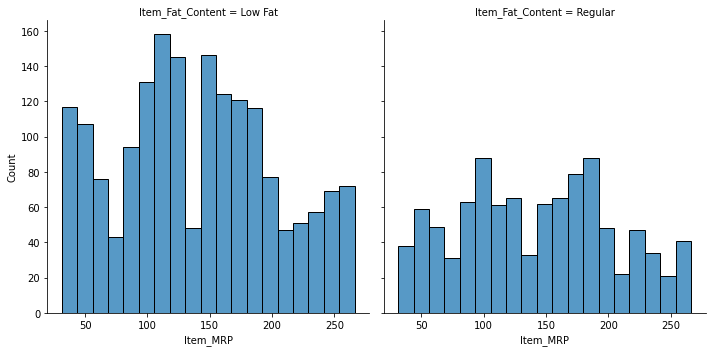

In [37]:
sns.displot(data=Medium_df, x='Item_MRP', col='Item_Fat_Content');
plt.rcParams.update({'font.size': 15}) 

Para las tiendas de size 'Medium' el precio de los productos Low Fat que mas se repite es 110.00, el precio que menos se repite es 70.00. Para los productos Regular Fat los precios que mas se repiten son 100.00 y 190.00, el precio que menos se repite es 250.00 

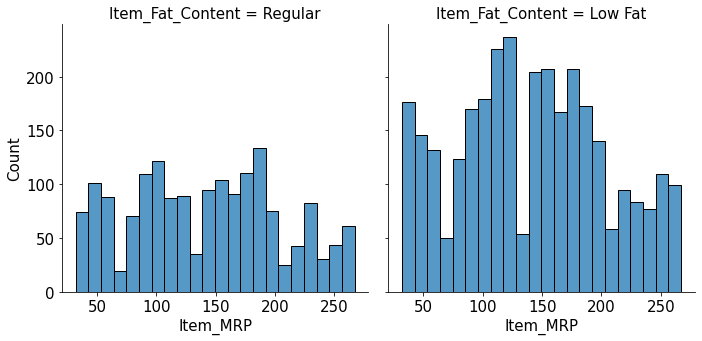

In [38]:
sns.displot(data=Small_df, x='Item_MRP', col='Item_Fat_Content');

Para las tiendas de size 'Small' el precio de los productos Low Fat que mas se repite es 120.00, el precio que menos se repite es 70.00. Para los productos Regular Fat el precios que mas se repite es 190, el precio que menos se repite es 70.00 

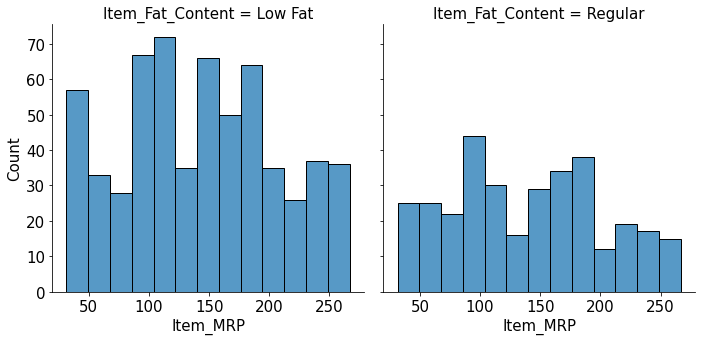

In [39]:
sns.displot(data=High_df, x='Item_MRP', col='Item_Fat_Content');

Para las tiendas de size 'High' el precio de los productos Low Fat que mas se repite es 110.00, el precio que menos se repite es 210.00. Para los productos Regular Fat el precios que mas se repite es 100.00, el precio que menos se repite es 200.00 

En estas graficas se puede observar que los productos con 'Low Fat' son mas costosos que los productos con 'Regular' Fat. 


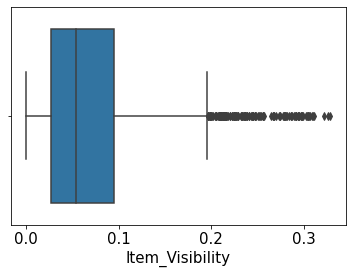

In [40]:
sns.boxplot(data=df2, x='Item_Visibility');

El rango de visibilidad de los productos es de 0.00 hasta 0.20, la media de la visibilidad de todos los productos es de 0.05. Data importante para comprender que tan asequible visualmente estan para los consumidores los productos.

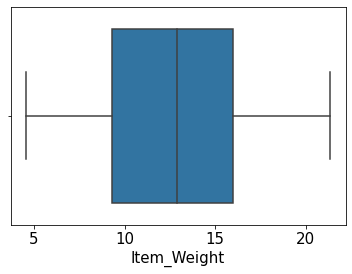

In [41]:
sns.boxplot(data=df2, x='Item_Weight');

El rango de peso de los productos es de 4.00 hasta 22.00, la media de peso de todos los productos es de 13.00. Informacion importante para saber el peso que deben de poder sostener los anaqueles 

<AxesSubplot:>

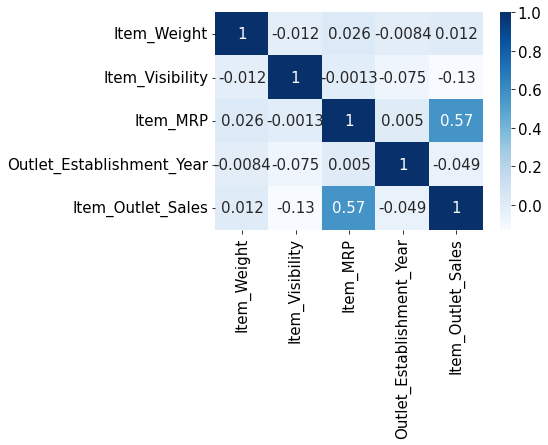

In [42]:
corr = df2.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

Hay una correlacion de 0.57 entre 'Item_Outlet_Sales' y ' Item_MRP. Esto significa que las ventas totales de un producto fluctuan en base a su precio (MRP)

Propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

In [43]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-Gráfico de barras que representa una estimación de la tendencia central de las ventas de productos por tiendas.

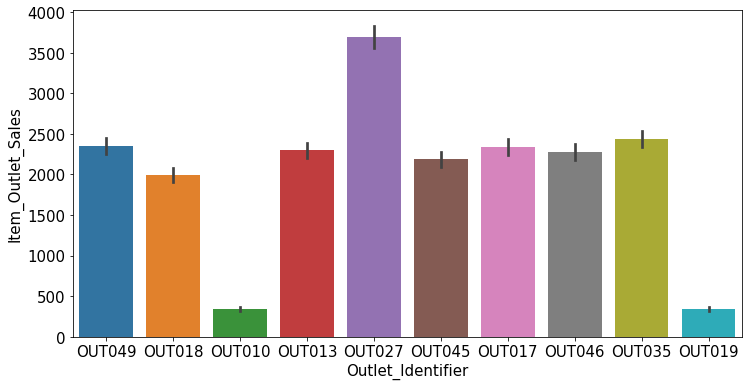

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'Outlet_Identifier', y= 'Item_Outlet_Sales',  data= df2);



La tienda OUT027 es la que tiene los ingresos totales por productos mas alto, basandonos en la estimación de la tendencia central de las ventas de la misma. Por otro lado la tienda que menos ingresos totales por producto tiene es la OUT010. 

-Gráfico de barras que representa las ventas totales de productos por tiendas.

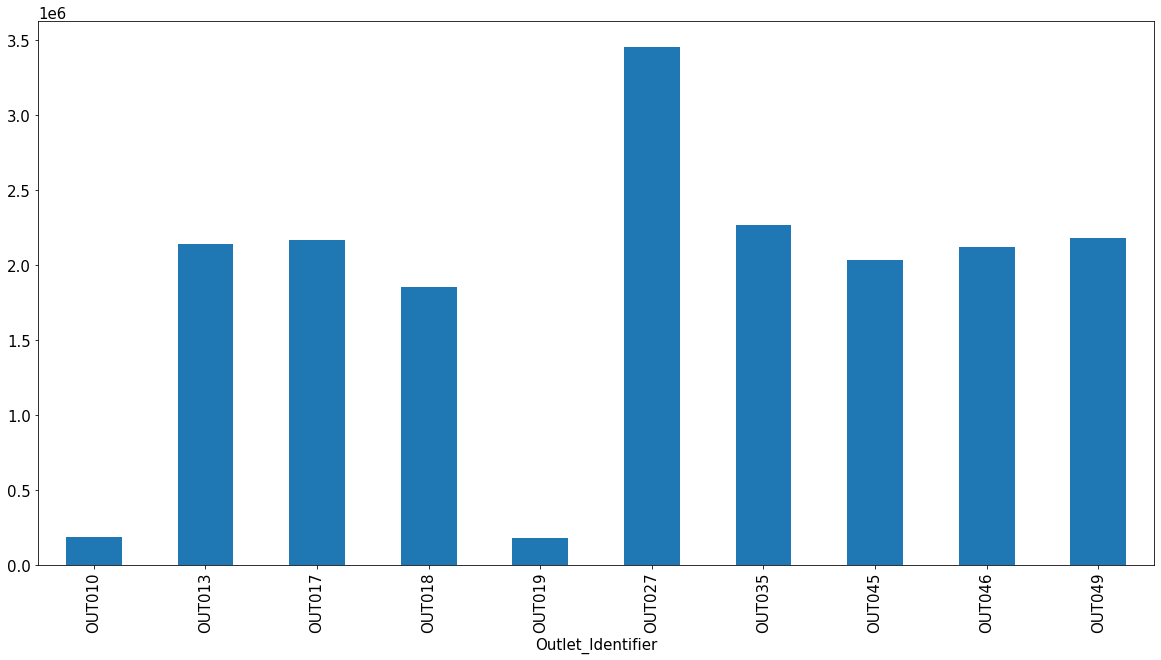

In [45]:
TOTAL_SALES_ID=df2.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
TOTAL_SALES_ID.plot(x='Outlet_Identifier', y='Item_Outlet_Sales', kind= 'bar', figsize=(20,10));
plt.rcParams.update({'font.size': 30}) 

In [46]:
df2.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].max()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store         Small
OUT013             Supermarket Type1      High
OUT017             Supermarket Type1     Small
OUT018             Supermarket Type2    Medium
OUT019             Grocery Store         Small
OUT027             Supermarket Type3    Medium
OUT035             Supermarket Type1     Small
OUT045             Supermarket Type1     Small
OUT046             Supermarket Type1     Small
OUT049             Supermarket Type1    Medium
Name: Outlet_Size, dtype: object

Los supermercados de 'Type 3' son los que mas ventas tienen, despues le siguen los supermercados de 'Type 1', mas abajo los supermercado de 'Type2', y por ultimo los 'Grocery Store'. 

In [47]:
df=df2
df['Sold_Units']=df['Item_Outlet_Sales']/df['Item_MRP']
df['Sold_Units'].round(decimals=2)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sold_Units
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


In [48]:
Type1 = df['Outlet_Type'] == 'Supermarket Type1'
Type1_df =df [Type1]

In [49]:
Type2 = df['Outlet_Type'] == 'Supermarket Type2'
Type2_df =df [Type2]

In [50]:
Type3 = df['Outlet_Type'] == 'Supermarket Type3'
Type3_df =df [Type3]

In [51]:
Grocery = df['Outlet_Type'] == 'Grocery Store'
Grocery_df =df [Grocery]

In [52]:
df.groupby(['Item_Type'])['Sold_Units'].sum()

Item_Type
Baking Goods              9943.687764
Breads                    3971.697765
Breakfast                 1572.019650
Canned                   10338.636977
Dairy                    10121.445515
Frozen Foods             12936.582569
Fruits and Vegetables    19331.405072
Hard Drinks               3321.842317
Health and Hygiene        8057.552691
Household                13836.714613
Meat                      6553.540510
Others                    2478.741999
Seafood                   1047.291893
Snack Foods              18718.673869
Soft Drinks               6861.378368
Starchy Foods             2381.904690
Name: Sold_Units, dtype: float64

-Grafica de barras que muestra el TOTAL de unidades vendidas por tipo de producto. 

In [53]:
Total_Units=df.groupby(['Item_Type'])['Sold_Units'].sum()

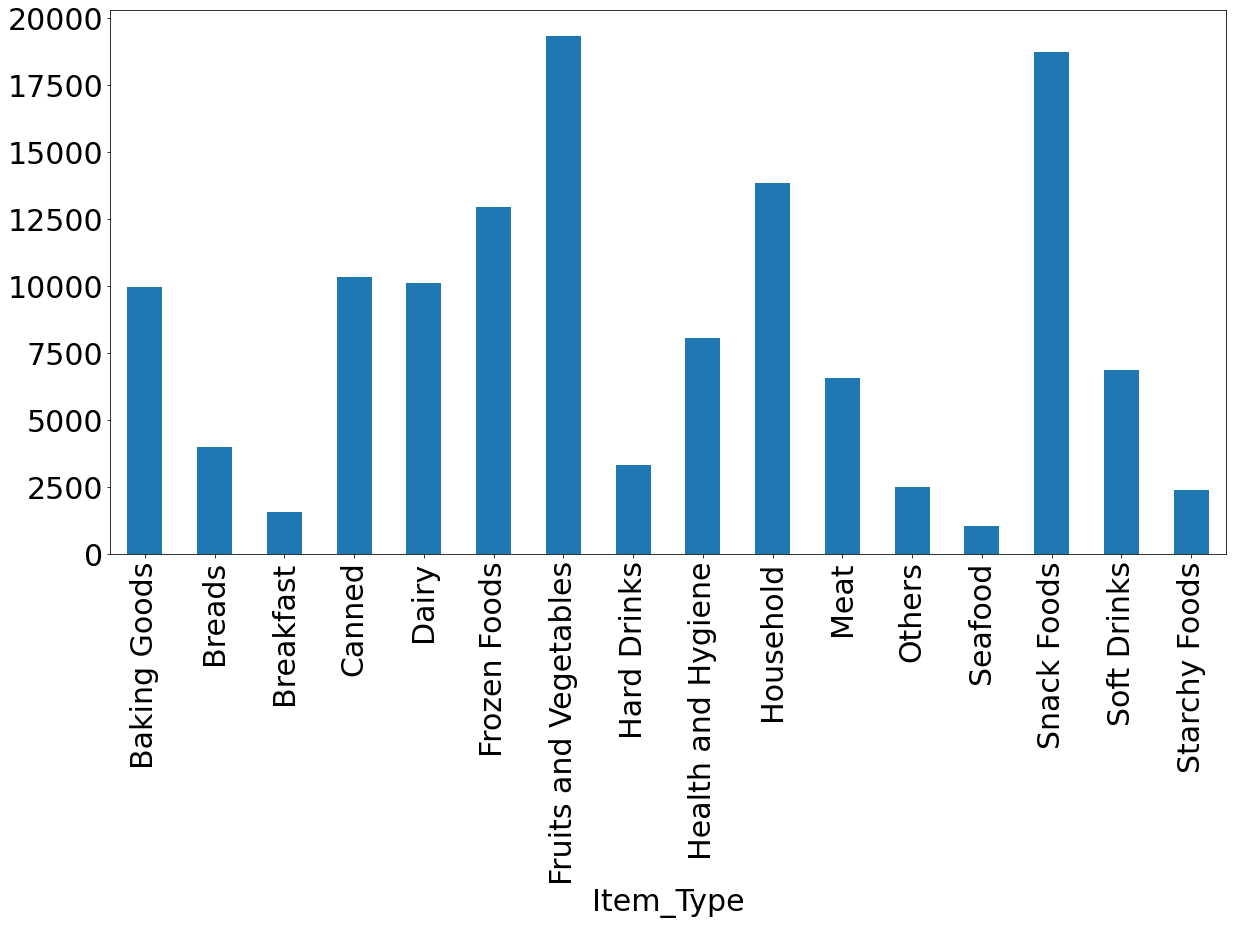

In [54]:
Total_Units.plot(x='Item_Type', y='Sold_Units', kind= 'bar', figsize=(20,10));
plt.rcParams.update({'font.size': 30}) 

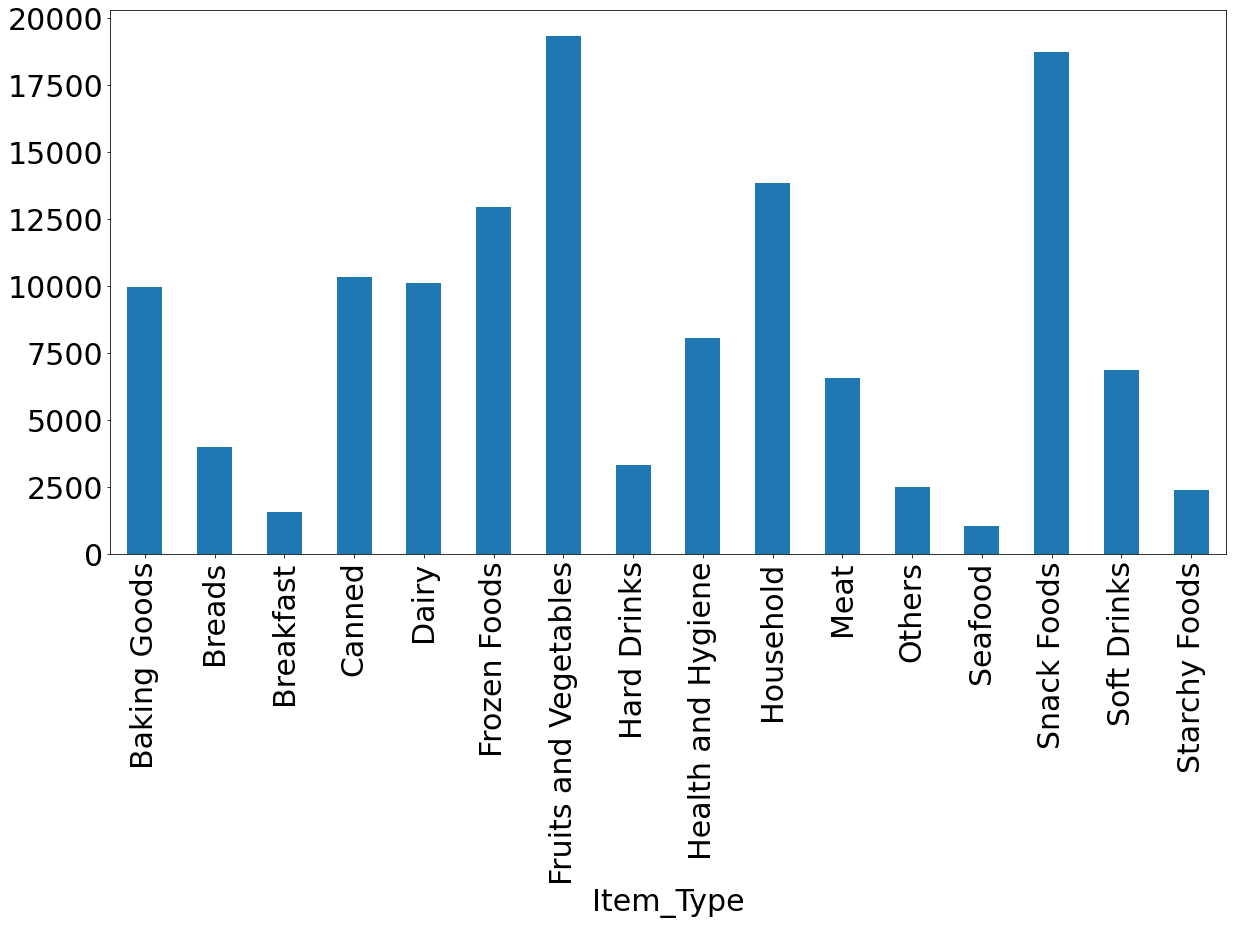

In [55]:
Total_Units.plot(x='Item_Type', y='Sold_Units', kind= 'bar', figsize=(20,10));
plt.rcParams.update({'font.size': 30}) 

En este grafico de barras se puede apreciar como el tipo de producto que mas se vende son los 'Fruits and Vegetables'. El tipo de producto que menos se venden son los 'Seafood'.

-Grafico pastel que muestra la composicion de productos vendidos contra la categoria 'Item Fat Content' 

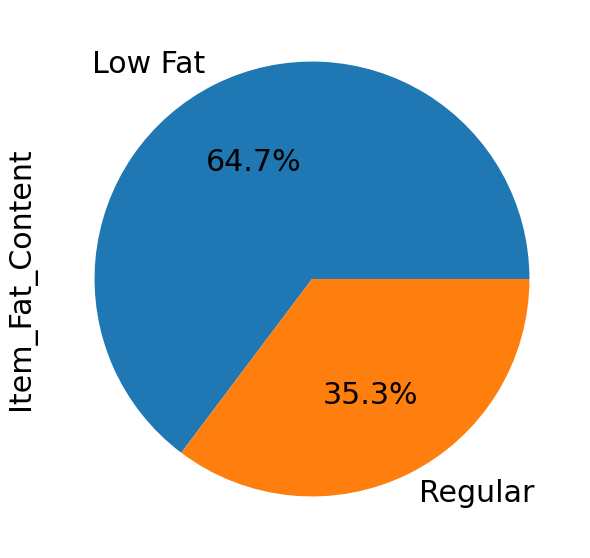

In [56]:
fat_content_df=df['Item_Fat_Content'].value_counts()
fat_content_df.plot(x='Item_Fat_Content', kind= 'pie', figsize=(20,10), autopct='%1.1f%%');

Como se observa en el grafico de pastel, un 64.7% de las unidades totales vendidas pertenencen a la categoria 'Low fat', el 35.3% restante pertenece a la categoria 'Regular'. se puede apreciar como la categoria de producto que mas se vende es la 'Low Fat'

Identificar el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  Realicen un train test split 

In [57]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sold_Units
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


In [59]:
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier','Item_Fat_Content','Sold_Units'], axis=1)
y = df['Item_Outlet_Sales']

#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Crear un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Sold_Units                 8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [61]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [62]:
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [63]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [64]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [65]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EAADD8BA58>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EAAD852278>)])

In [66]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EAADD8BA58>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EAAD852278>)])

In [67]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [68]:
# Comprobacion
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 30)




array([[ 0.81713184, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55662597, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13016225,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11316125, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76442593, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81713184, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

Modelos de prediccion

1) Crear un modelo de regresión lineal para predecir las ventas.

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
# Make a linear regression instance
reg = LinearRegression()

In [71]:
reg.fit(X_train_processed,y_train)

LinearRegression()

In [72]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [73]:

#Coeficiente de determinación (r^2): 
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.5589842174136409
0.5657665273220728


In [74]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

In [75]:
# Raíz del error cuadrático medio (RECM): 
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1142.438914586441
1094.5502677921252


In [76]:
# error cuadrático medio (ECM). 
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)


1305166.673561445
1198040.2887238127


In [77]:
#Error absoluto medio (EAM): 
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_train)
print(mae_test)

848.9112183354193
806.3154415767245


2) Crear un modelo de árbol de regresión para predecir las ventas.

In [78]:
# Esto ya se importó antes, así que lo comentamos
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [79]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [80]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [81]:
train_preds_arbol = dec_tree.predict(X_train_processed)
test_preds_arbol = dec_tree.predict(X_test_processed)

In [82]:
# r^2
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.22559868865892474


In [83]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds_arbol))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds_arbol))
print(rmse_train)
print(rmse_test)

0.0
1461.6961481914482


3) Modelo a implementar.

Definitivamene el modelo recomendado es el de la regresion linear, ya que este proporciona un valor de Coeficiente de determinación de 0.5589842174136409 para el entrenamiento y 0.5657665273220728 para la prueba. Tambien la Raíz del error cuadrático medio para el entrenamiento y la prueba es 1142.438914586441 y 1094.5502677921252 respectivamente. No Obstante se concluye con que el data set proporcionado es inconsistente, por lo que cuando se quiera utilizar el modelo para predecir los resultados no seran positivos. Esta conclusion se obtiene viendo los resultados del coeficiente de determinacion y el error cuadratico medio. 

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Sold_Units                 8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: